 dataset obsahuje nasledujıcı promenne:
 - GRE skore (maximalne 340 bodu)
 - TOEFL skore (maxim ́alne 120 bodu)
 - Hodnocenı univerzity (1 az 5 bodu)
 - Sıla motivacnıho dopisu a doporucenı (1 az 5 bodu)
 - Prumerna znamka z bakalarsk eho studia (maxiḿalne 10 bodu)
 - Zkusenosti s vyzkumem (0 nebo 1)
 - sance na prijetı (hodnota mezi 0 a 1)

### 1. příprava dat

In [20]:
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt


data = pd.read_csv("C:/Users/evamo/Desktop/PythonProDataScience/Domaci_ukoly/adm_data.csv")
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### 2. Normálnost dat pro TOEFL skóre

Nejdřív si zjistím rozsah hodnot ve sloupci TOEFL Score:

In [2]:
data ["TOEFL Score"].min()

92

In [3]:
data ["TOEFL Score"].max()

120

Vypočítám průměr:

In [4]:
data ["TOEFL Score"].mean()

107.41

Vypočítám medián:

In [5]:
data ["TOEFL Score"].median()

107.0

Vypočítám směrodatnou odchylku:

In [6]:
data["TOEFL Score"].std()

6.069513777374126

Vytvořím histogram pro TOEFL skore a zobrazím odhadovanou křivku pravděpodobnostního rozdělení:

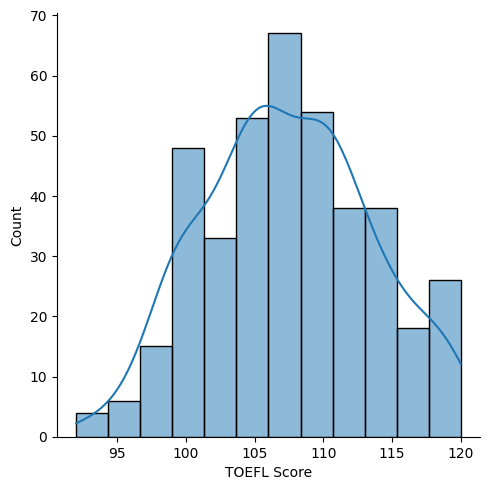

In [7]:
sns.displot(data=data, x="TOEFL Score", kde=True)

Pomocí statistického testu zjistím, zda je TOEFL skóre vybráno z normálního rozdělení. Uvažuji hladinu významnosti 95 %. Formuluju následující hypotézy:
- H0: Data mají normální rozdělení.
- H1: Data nemají normální rozdělení.

In [8]:
stats.normaltest(data["TOEFL Score"])

NormaltestResult(statistic=11.070212103496331, pvalue=0.003945790155853822)

Je 0,4procentní pravděpodobnost (pvalue < 0,05), že tato data jsou z normálního rozdělení. Musíme H0 odmítnout a říct, že data nemají normální rozdělení.

### 3. Testování hypotéz

Rozdělím data na studenty, kteří mají (1) a nemají (0) zkušenosti s výzkumem.

In [9]:
data_research_1 = data[data["Research"] == 1]
data_research_0 = data[data["Research"] == 0]

Pro obě skupiny spočítám průměrné GRE skóre.

In [10]:
data_research_1 ["GRE Score"].mean()

322.85388127853884

In [11]:
data_research_0 ["GRE Score"].mean()

309.49171270718233

**Otestuji, zda existuje statisticky významný rozdíl v GRE skóre mezi těmito dvěma skupinami studentů.** 


Nejdřív ale otestuji normalitu rozdělení GRE skóre v obou datasetech. Začnu nejprve studenty, kteří `mají` zkušenost s výzkumem. Uvažuji hladinu významnosti 95 %. Formuluji hypotézy:
- H0: Data mají normální rozdělení.
- H1: Data nemají normální rozdělení.

In [12]:
stats.normaltest(data_research_1["GRE Score"])

NormaltestResult(statistic=10.539299481397224, pvalue=0.005145412486026274)

Je 0,5procentní pravděpodobnost (pvalue < 0,05), že tato data jsou z normálního rozdělení. Musíme H0 odmítnout a říct, že data (GRE skóre studentů `se zkušenostmi` s výzkumem) nemají normální rozdělení.

Nyní otestuji normalitu rozdělení GRE skóre u studentů, kteří `nemají` zkušenost s výzkumem. Opět uvažuji hladinu významnosti 95 % a formuluji hypotézy:
- H0: Data mají normální rozdělení.
- H1: Data nemají normální rozdělení.

In [13]:
stats.normaltest(data_research_0["GRE Score"])

NormaltestResult(statistic=0.9962407495635873, pvalue=0.6076717821415273)

Je 61procentní pravděpodobnost (pvalue > 0,05), že tato data jsou z normálního rozdělení. H0 nezamítáme a můžeme říct, že data (GRE skóre studentů `bez zkušeností` s výzkumem) mají normální rozdělení.

Nyní se můžu vrátit k hlavnímu úkolu této části: otestovat, zda existuje statisticky významný rozdíl v GRE skóre mezi oběma skupinami studentů. Uvažuji hladinu významnosti 95 %, formuluji si hypotézy.

- H0: Střední hodnoty GRE skóre pro obě skupiny studentů jsou stejné.
- H1: Střední hodnota GRE skóre pro obě skupiny studentů se liší.

Vybírám vhodný testu podle následujících kritérií:

- Mám dvě sady dat, potřebuji tedy dvouvýběrový test.
- Porovnávám střední hodnotu (průměr) výběrů.
- Data nemají normální rozdělení. (Jeden nemá, druhý má)
- Oba výběry jsou nezávislé, nejde o párová pozorování.

Použiju **Mann-Whitneyho U test**, neparametrický test, který se používá k porovnání středních hodnot dvou nezávislých výběrů, když data nejsou normálně rozdělená. Tento test je robustní vůči odchylkám od normálního rozdělení a nevyžaduje, aby data splňovala předpoklad normálního rozdělení. 

In [14]:
statistics, pvalue = stats.mannwhitneyu(data_research_1["GRE Score"], data_research_0["GRE Score"])
pvalue

1.1433386421648098e-32

Protože p-hodnota je menší než 0.05, na zvolené hladině významnosti zamítám nulovou hypotézu. Jinými slovy, prokázala jsem, že **existuje statisticky významný rozdíl v GRE skóre mezi dvěma skupinami studentů**. Neboli - `zkušenost s výzkumem má vliv na GRE skóre`.

### 4. Korelace

Vypočítám korelaci mezi TOEFL skóre a GRE skóre.

In [21]:
data["TOEFL Score"].corr(data["GRE Score"])

0.8359768030143966

Korelační koeficient se blíží 1, proto můžeme říct, že TOEFL skóre a GRE skóre jsou `relativně silně přímo lineárně závislé`. Tedy, když jedna hodnota roste, druhá roste také.

Vytvořím korelační graf pro vysvětlovanou proměnnou šance na přijetí (Chance of Admit) a proměnnou, která je s ní nejvíce korelovaná. Nejdřív je ale potřeba zjistit, která proměnná to je, nebo-li, která proměnná bude na ose x.

In [30]:
correlation_matrix = data.corr()
most_correlated_variable = correlation_matrix["Chance of Admit "].sort_values(ascending=False).index[1]
print (most_correlated_variable)

CGPA


In [42]:
data["Chance of Admit "].corr(data["CGPA"])

0.8732890993553003

Zjistila jsem, že s proměnnou šance na přijetí (Chance of Admit) nejvíc koreluje proměnná CGPA (Cumulative Grade Point Average), tedy průměrná známka z bakalářského studia. Korelační koeficient je roven 0,87. Tuto proměnnou tedy dosadím do grafu na osu x.

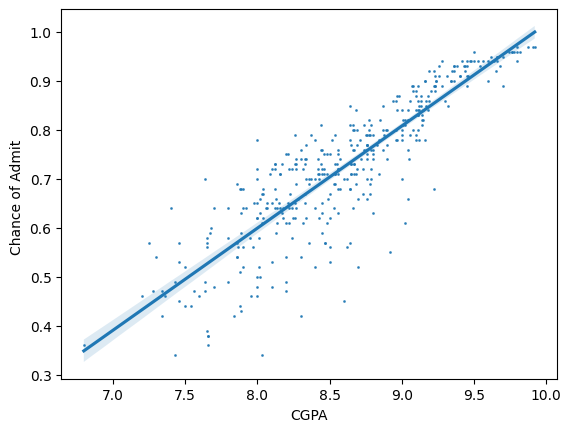

In [41]:
g = sns.regplot(data, x="CGPA", y="Chance of Admit ", scatter_kws={"s": 1})

### 5. Vysvětlovaná proměnná

Naší vysvětlovanou proměnnou je šance na přijetí (Chance of Admit). Vytvořím boxplot, abych vizuálně identifikovala případné odlehlé hodnoty.

<Axes: xlabel='Chance of Admit '>

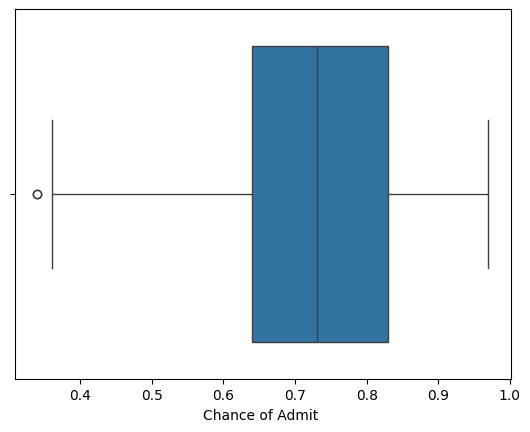

In [43]:
sns.boxplot(data, x="Chance of Admit ")

Z boxplotu jsem zjistila, že existuje odlehlé pozorování. To odstraním. To je důležité proto, že odlehlá pozorování mají tendenci "přitahovat" si k sobě regresní funkci. To pak může regresní funkci vychýlit a ona bude zobrazovat chybné výsledky.

In [44]:
Q1 = data["Chance of Admit "].quantile(0.25)
Q3 = data["Chance of Admit "].quantile(0.75)

# mezikvartilove_rozpeti
IQR = Q3 - Q1 

lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

# Filtrace dat a odstranění odlehlých hodnot
data = data[(data["Chance of Admit "] >= lower_whisker) & (data["Chance of Admit "] <= upper_whisker)]

Ověřím si, že v očištěném datasetu už odlehlé pozorování není.

<Axes: xlabel='Chance of Admit '>

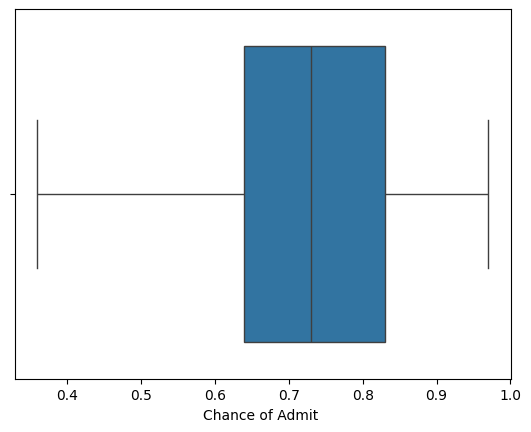

In [45]:
sns.boxplot(data, x="Chance of Admit ")

### 6. Lineární regrese

Sestavím rovnici lineární regrese a zahrnu do ní všechny proměnné, které dávají smysl. Nejdřív si ale musím přejmenovat názvy sloupců.

In [66]:
data.columns = ['Serial_No', 'GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance_of_Admit']

print(data.columns)

Index(['Serial_No', 'GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance_of_Admit'],
      dtype='object')


Odhaduji parametry lineárního regresního modelu.

In [68]:
from statsmodels.stats.outliers_influence import OLSInfluence

formula = "Chance_of_Admit ~ GRE_Score + TOEFL_Score + University_Rating + SOP + LOR + CGPA + Research"
mod = smf.ols(formula=formula, data=data)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance_of_Admit   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     229.9
Date:                Sun, 12 May 2024   Prob (F-statistic):          3.78e-134
Time:                        12:18:34   Log-Likelihood:                 542.56
No. Observations:                 398   AIC:                            -1069.
Df Residuals:                     390   BIC:                            -1037.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.2107      0.123     -9.855      0.000      -1.452      -0.969
GRE_Score             0.0017      0.001      2.843      0.005       0.001       0.003
TOEFL_Score           0.0026      0.001      2.467      0.014       0.001       0.005
University_Rating     0.0054      0.005      1.147      0.252      -0.004       0.015
SOP                  -0.0003      0.005     -0.063      0.950      -0.011       0.010
LOR                   0.0210      0.005      3.861      0.000       0.010       0.032
CGPA                  0.1190      0.012      9.920      0.000       0.095       0.143
Research              0.0237      0.008      3.040      0.003       0.008       0.039
==============================================================================
Omnibus:                       88.327   Durbin-Watson:                   0.774
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.308
Skew:                          -1.164   Prob(JB):                     9.50e-41
Kurtosis:                       5.386   Cond. No.                     1.31e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Jako `statisticky významné` hodnotím koeficienty CGPA (průměrná známka z bakalářského studia) a pak s odstupem Research (zda má student zkušenost s výzkumem) a LOR (zřejmě doporučení). Ty budou mít (v tomto pořadí) `největší vliv na úspěšnost přijetí` (Chance_of_Admit). 
Hodnota koeficitentu u CGPA 0,1190 nám říká, že zlepšení průměrné známky v bakalářském studiu o jednotku zvýší šanci na přijetí o 0,119. 

Hodnotím kvalitu fitu lineárního modelu pomocí koeficientu determinace. Koeficient determinace (R-squared) je statistická míra, která poskytuje informaci o tom, jak dobře se lineární regresní model přizpůsobuje datům. Vyjadřuje procento variability závislé proměnné (v našem případě Šance na přijetí), která je vysvětlena (modelována) nezávislými proměnnými ve regresním modelu. V tomto případě $R^2$= 0.805. Dokáže tedy vysvětlit přibližně `81 % variability šancí na přijetí`.

### 7. Cookova vzdálenost

Spočítám Cookovu vzdálenost pro jednotlivé body. Cookova vzdálenost říká, o kolik by se regresní funkce "posunula", pokud bychom konkrétní bod vynechali. Pokud je Cookova vzdálenost malá, znamená to, že vynechání konkrétního pozorování nemá významný vliv na parametry modelu nebo predikce.

In [70]:
influence = OLSInfluence(res)
data['Cook Distance'] = influence.cooks_distance[0]
data.head()

C:\Users\evamo\AppData\Local\Temp\ipykernel_1888\1991304522.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cook Distance'] = influence.cooks_distance[0]


,Serial_No,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit,Cook Distance
0,1,337,118,4,4.5,4.5,9.65,1,0.92,0.000383
1,2,324,107,4,4.0,4.5,8.87,1,0.76,0.000811
2,3,316,104,3,3.0,3.5,8.00,1,0.72,0.002403
3,4,322,110,3,3.5,2.5,8.67,1,0.80,0.001627
4,5,314,103,2,2.0,3.0,8.21,0,0.65,0.000098


Vytvořím histogram pro Cookovy vzdálenosti, abych zjistila, jestli je potřeba některé body odstranit. Jednoduché pravidlo (*rule of the thumb*) doporučuje odstranit hodnoty s Cookovou vzdáleností vyšší než 1.

<Axes: xlabel='Cook Distance', ylabel='Count'>

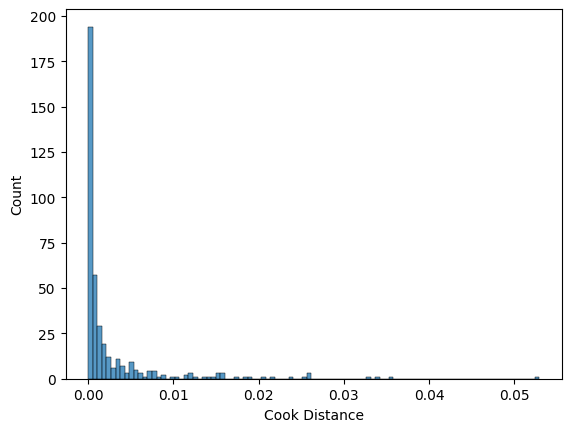

In [71]:
sns.histplot(data=data, x="Cook Distance")

Žádné body neovlivňují regresní model natolik, že by bylo lepší je vyhodit.